In [76]:
import pycalculix as pyc

In [77]:
model_name = 'polygon_hole'
model = pyc.FeaModel(model_name)
model.set_units('m')

Units have been set to m_N
For stress use Pa
For density use kg/(m^3)
For dist use m
For time use s
For force use N
For temp use K
For displ use m


In [78]:
part = pyc.Part(model)
part.goto(0,0)
part.draw_line_rad(5)
part.draw_line_ax(5)
part.draw_line_rad(-5)
part.draw_line_ax(-5)

File multi_polygon_hole_prechunk_areas.png was saved.


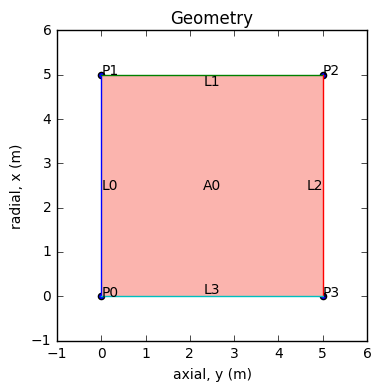

In [79]:
model.plot_geometry(model_name+'_prechunk_areas')

File multi_polygon_hole_prechunk_areas.png was saved.


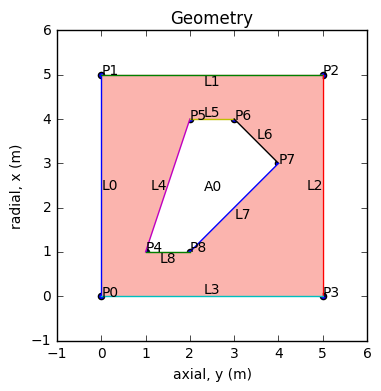

In [80]:
# Create the hole
part.goto(1, 1, holemode=True)
part.draw_line_to(4, 2)
part.draw_line_to(4, 3)
part.draw_line_to(3, 4)
part.draw_line_to(1, 2)
part.draw_line_to(1, 1)
model.plot_geometry(model_name+'_prechunk_areas')

File: multi_polygon_hole.geo was written
C:\Anaconda2\envs\py3k\lib\site-packages\pycalculix\gmsh_win32\gmsh.exe multi_polygon_hole.geo -2 -o multi_polygon_hole.inp
File: multi_polygon_hole.inp was written
Meshing done!
File: multi_polygon_hole.msh was written
Re-indexing elements to min element number of: 1
Old min:2259  max:2367
New min:1  max:109
Elements: 109
Nodes: 265
Done reading Calculix/Abaqus .inp file


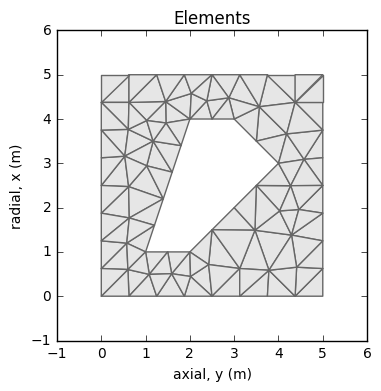

In [86]:
model.set_eshape('tri', 2)
model.mesh(1.0, 'gmsh')
model.plot_elements()

In [89]:
# set loads and constraints
model.set_load('press',part.top,-1000)
#model.set_constr('fix',part.left,'y')
model.set_constr('fix',part.bottom,'x')

# set part material
mat = pyc.Material('steel')
mat.set_mech_props(7800, 210*(10**9), 0.3)
model.set_matl(mat, part)

File multi_polygon_hole_elem.png was saved.


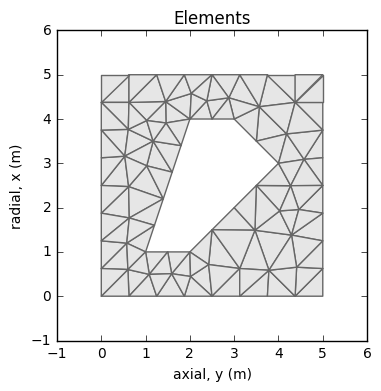

File multi_polygon_hole_press.png was saved.


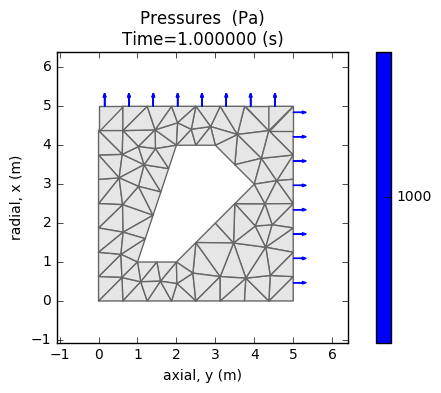

File multi_polygon_hole_constr.png was saved.


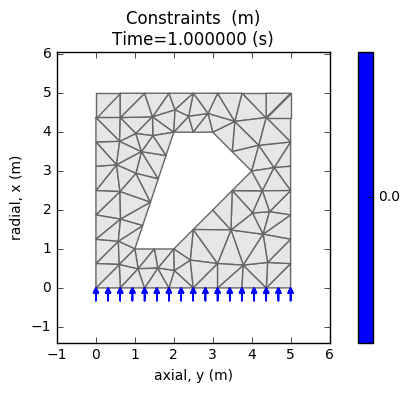

In [90]:
model.plot_elements(model_name+'_elem')   # plot part elements
model.plot_pressures(model_name+'_press')
model.plot_constraints(model_name+'_constr')

In [84]:
# make and solve the model
prob = pyc.Problem(model, 'struct')
prob.solve()


# view and query results
sx = prob.rfile.get_nmax('Sx')
print('Sx_max: %f' % sx)
[fx, fy, fz] = prob.rfile.get_fsum(model.get_item('L5'))
print('Reaction forces (fx,fy,fz) = (%12.10f, %12.10f, %12.10f)' % (fx, fy, fz)) 

# Plot results
fields = 'Sx,Sy,S1,S2,S3,Seqv,ux,uy,utot,ex'    # store the fields to plot
fields = fields.split(',')
for field in fields:
    fname = model_name+'_'+field
    prob.rfile.nplot(field, fname, display=False)

INFO: 265 nodes
INFO: 109 CPS6 elements
INFO: 109 total elements
File: multi_polygon_hole.inp was written
C:\Anaconda2\envs\py3k\lib\site-packages\pycalculix\calculix_win64\ccx.exe multi_polygon_hole
Solving done!
Reading results file: multi_polygon_hole.frd
Reading nodes
Reading displ storing: ux,uy,uz,utot
Reading stress storing: Sx,Sy,Sz,Sxy,Syz,Szx,Seqv,S1,S2,S3
Reading strain storing: ex,ey,ez,exy,eyz,ezx,eeqv,e1,e2,e3
Reading force storing: fx,fy,fz
The following times have been read:
[1.0]
Done reading file: multi_polygon_hole.frd
Results file time set to: 1.000000
The following times have been read:
[1.0]
Results from file: multi_polygon_hole.dat have been read.
Sx_max: 5396.010000
Reaction forces (fx,fy,fz) = (0.0000000000, 0.0000000000, 0.0000000000)
File multi_polygon_hole_Sx.png was saved.
File multi_polygon_hole_Sy.png was saved.
File multi_polygon_hole_S1.png was saved.
File multi_polygon_hole_S2.png was saved.
File multi_polygon_hole_S3.png was saved.
File multi_polygon_